In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import statsmodels.api as sm1
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

df_DataSet = pd.read_excel('https://github.com/eliasruizbone/Coder-DS/raw/main/DataSet/SuperTiendas/Supertiendas-RuizboneElias.xlsx', engine='openpyxl')

In [94]:
X = pd.get_dummies(df_DataSet[['Category','Sub-Category','Discount']])

y = df_DataSet['Profit']

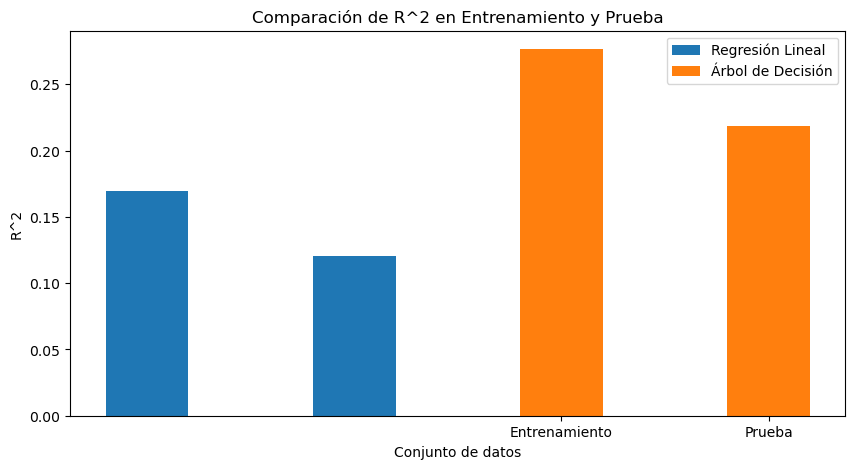

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)


modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)


r2_entrenamiento_lineal = modelo_lineal.score(X_train, y_train)
r2_prueba_lineal = modelo_lineal.score(X_test, y_test)

r2_entrenamiento_arbol = modelo_arbol.score(X_train, y_train)
r2_prueba_arbol = modelo_arbol.score(X_test, y_test)


plt.figure(figsize=(10, 5))
plt.bar([1, 2], [r2_entrenamiento_lineal, r2_prueba_lineal], width=0.4, label='Regresión Lineal', tick_label=['Entrenamiento', 'Prueba'])
plt.bar([3, 4], [r2_entrenamiento_arbol, r2_prueba_arbol], width=0.4, label='Árbol de Decisión', tick_label=['Entrenamiento', 'Prueba'])
plt.xlabel('Conjunto de datos')
plt.ylabel('R^2')
plt.title('Comparación de R^2 en Entrenamiento y Prueba')
plt.legend()
plt.show()



In [103]:
data = {
    'Modelo': ['Regresión Lineal', 'Regresión Lineal', 'Árbol de Decisión', 'Árbol de Decisión'],
    'Conjunto de Datos': ['Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba'],
    'R^2': [r2_entrenamiento_lineal, r2_prueba_lineal, r2_entrenamiento_arbol, r2_prueba_arbol]
}

df = pd.DataFrame(data)

print(df)

              Modelo Conjunto de Datos       R^2
0   Regresión Lineal     Entrenamiento  0.169190
1   Regresión Lineal            Prueba  0.120145
2  Árbol de Decisión     Entrenamiento  0.276601
3  Árbol de Decisión            Prueba  0.218391


# Conclusión

Luego de evaluar los resultados de nuestros modelos de regresión, podemos llegar a las siguientes conclusiones:

**Identificación de Overfitting y Underfitting**

Para evaluar si nuestros modelos sufren de overfitting o underfitting, observamos el coeficiente R^2 en los conjuntos de entrenamiento y prueba. Un valor bajo de R^2 en el conjunto de prueba podría indicar underfitting, mientras que un valor alto de R^2 en el conjunto de entrenamiento, pero bajo en el conjunto de prueba, podría ser una señal de overfitting.

**Modelo de Regresión Lineal:**

- R^2 en el conjunto de entrenamiento: 0.1692
- R^2 en el conjunto de prueba: 0.1201

Nuestro modelo de regresión lineal muestra valores bajos de R^2 en ambos conjuntos de datos. Esto sugiere que el modelo es demasiado simple y no logra capturar la relación en los datos, lo que indica underfitting.

**Modelo de Árbol de Decisión:**

- R^2 en el conjunto de entrenamiento: 0.2766
- R^2 en el conjunto de prueba: 0.2184

El modelo de árbol de decisión presenta un R^2 más alto en ambos conjuntos en comparación con el modelo lineal. Aunque hay una mejora, todavía podría haber overfitting en el conjunto de prueba, ya que el R^2 en prueba es más bajo que en entrenamiento.

En resumen, nuestros modelos muestran signos de underfitting en el caso del modelo de regresión lineal y de overfitting en el caso del modelo de árbol de decisión.